In [1]:
#https://matplotlib.org/examples/event_handling/index.html

In [2]:
#%matplotlib notebook

from __future__ import print_function
import matplotlib.pyplot as plt


#def handle_close(evt):
#    print('Closed Figure!')

fig = plt.figure()
#fig.canvas.mpl_connect('close_event', handle_close)

plt.text(0.35, 0.5, 'Close Me!', dict(size=30))
plt.show()

<Figure size 640x480 with 1 Axes>

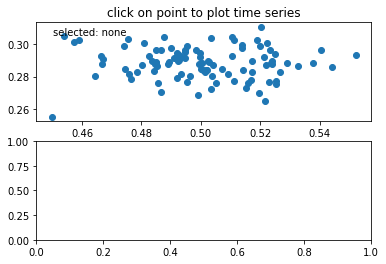

In [3]:
import numpy as np


class PointBrowser(object):
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """

    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    X = np.random.rand(100, 200)
    xs = np.mean(X, axis=1)
    ys = np.std(X, axis=1)

    fig, (ax, ax2) = plt.subplots(2, 1)
    ax.set_title('click on point to plot time series')
    line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

    browser = PointBrowser()

    fig.canvas.mpl_connect('pick_event', browser.onpick)
    fig.canvas.mpl_connect('key_press_event', browser.onpress)

    plt.show()

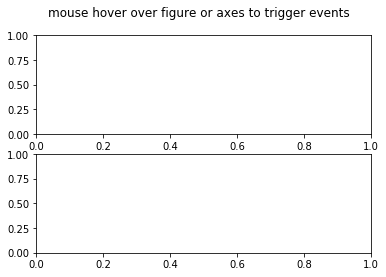

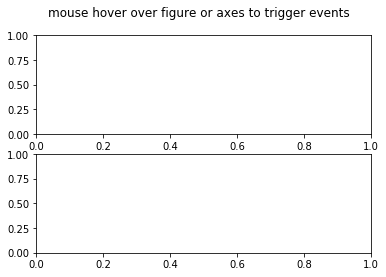

In [4]:
"""
Illustrate the figure and axes enter and leave events by changing the
frame colors on enter and leave
"""
from __future__ import print_function
import matplotlib.pyplot as plt


def enter_axes(event):
    print('enter_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('yellow')
    event.canvas.draw()


def leave_axes(event):
    print('leave_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('white')
    event.canvas.draw()


def enter_figure(event):
    print('enter_figure', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('red')
    event.canvas.draw()


def leave_figure(event):
    print('leave_figure', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('grey')
    event.canvas.draw()

fig1, (ax, ax2) = plt.subplots(2, 1)
fig1.suptitle('mouse hover over figure or axes to trigger events')

fig1.canvas.mpl_connect('figure_enter_event', enter_figure)
fig1.canvas.mpl_connect('figure_leave_event', leave_figure)
fig1.canvas.mpl_connect('axes_enter_event', enter_axes)
fig1.canvas.mpl_connect('axes_leave_event', leave_axes)

fig2, (ax, ax2) = plt.subplots(2, 1)
fig2.suptitle('mouse hover over figure or axes to trigger events')

fig2.canvas.mpl_connect('figure_enter_event', enter_figure)
fig2.canvas.mpl_connect('figure_leave_event', leave_figure)
fig2.canvas.mpl_connect('axes_enter_event', enter_axes)
fig2.canvas.mpl_connect('axes_leave_event', leave_axes)

plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: idle_event is only implemented for the wx backend, and will be removed in matplotlib 2.1. Use the animations module instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


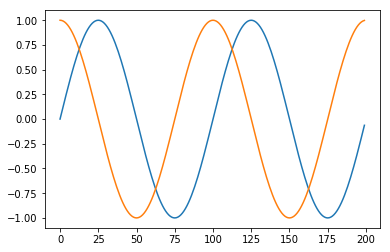

In [5]:
from __future__ import print_function
"""
Demonstrate/test the idle and timeout API

WARNING: idle_event is deprecated. Use the animations module instead.

This is only tested on gtk so far and is a prototype implementation
"""
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t = np.arange(0.0, 2.0, 0.01)
y1 = np.sin(2*np.pi*t)
y2 = np.cos(2*np.pi*t)
line1, = ax.plot(y1)
line2, = ax.plot(y2)

N = 100


def on_idle(event):
    on_idle.count += 1
    print('idle', on_idle.count)
    line1.set_ydata(np.sin(2*np.pi*t*(N - on_idle.count)/float(N)))
    event.canvas.draw()
    # test boolean return removal
    if on_idle.count == N:
        return False
    return True
on_idle.cid = None
on_idle.count = 0

fig.canvas.mpl_connect('idle_event', on_idle)

plt.show()

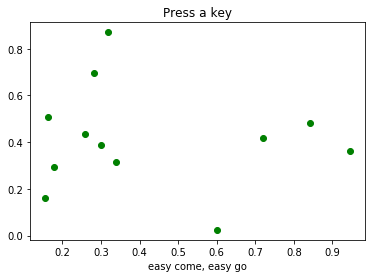

In [6]:
"""
Show how to connect to keypress events
"""
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt


def press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'x':
        visible = xl.get_visible()
        xl.set_visible(not visible)
        fig.canvas.draw()

fig, ax = plt.subplots()

fig.canvas.mpl_connect('key_press_event', press)

ax.plot(np.random.rand(12), np.random.rand(12), 'go')
xl = ax.set_xlabel('easy come, easy go')
ax.set_title('Press a key')
plt.show()

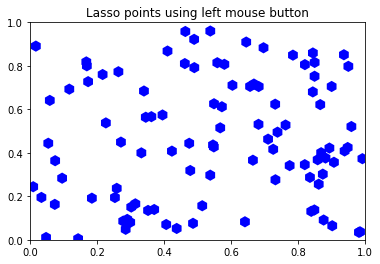

In [7]:
"""
Show how to use a lasso to select a set of points and get the indices
of the selected points.  A callback is used to change the color of the
selected points

This is currently a proof-of-concept implementation (though it is
usable as is).  There will be some refinement of the API.
"""
from matplotlib.widgets import Lasso
from matplotlib.collections import RegularPolyCollection
from matplotlib import colors as mcolors, path

import matplotlib.pyplot as plt
from numpy import nonzero
from numpy.random import rand


class Datum(object):
    colorin = mcolors.to_rgba("red")
    colorout = mcolors.to_rgba("blue")

    def __init__(self, x, y, include=False):
        self.x = x
        self.y = y
        if include:
            self.color = self.colorin
        else:
            self.color = self.colorout


class LassoManager(object):
    def __init__(self, ax, data):
        self.axes = ax
        self.canvas = ax.figure.canvas
        self.data = data

        self.Nxy = len(data)

        facecolors = [d.color for d in data]
        self.xys = [(d.x, d.y) for d in data]
        self.collection = RegularPolyCollection(
            6, sizes=(100,),
            facecolors=facecolors,
            offsets=self.xys,
            transOffset=ax.transData)

        ax.add_collection(self.collection)

        self.cid = self.canvas.mpl_connect('button_press_event', self.onpress)

    def callback(self, verts):
        facecolors = self.collection.get_facecolors()
        p = path.Path(verts)
        ind = p.contains_points(self.xys)
        for i in range(len(self.xys)):
            if ind[i]:
                facecolors[i] = Datum.colorin
            else:
                facecolors[i] = Datum.colorout

        self.canvas.draw_idle()
        self.canvas.widgetlock.release(self.lasso)
        del self.lasso

    def onpress(self, event):
        if self.canvas.widgetlock.locked():
            return
        if event.inaxes is None:
            return
        self.lasso = Lasso(event.inaxes,
                           (event.xdata, event.ydata),
                           self.callback)
        # acquire a lock on the widget drawing
        self.canvas.widgetlock(self.lasso)

if __name__ == '__main__':

    data = [Datum(*xy) for xy in rand(100, 2)]
    ax = plt.axes(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
    ax.set_title('Lasso points using left mouse button')

    lman = LassoManager(ax, data)

    plt.show()

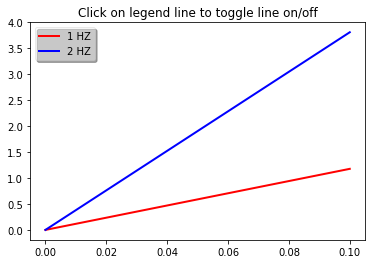

In [8]:
"""
Enable picking on the legend to toggle the original line on and off
"""
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, color='red', label='1 HZ')
line2, = ax.plot(t, y2, lw=2, color='blue', label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)


# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    print(legline)
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

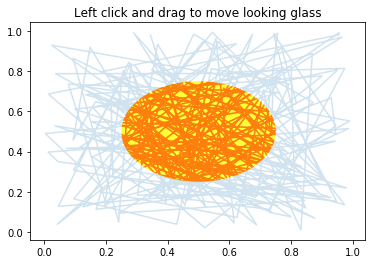

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
x, y = np.random.rand(2, 200)

fig, ax = plt.subplots()
circ = patches.Circle((0.5, 0.5), 0.25, alpha=0.8, fc='yellow')
ax.add_patch(circ)


ax.plot(x, y, alpha=0.2)
line, = ax.plot(x, y, alpha=1.0, clip_path=circ)
ax.set_title("Left click and drag to move looking glass")


class EventHandler(object):
    def __init__(self):
        fig.canvas.mpl_connect('button_press_event', self.onpress)
        fig.canvas.mpl_connect('button_release_event', self.onrelease)
        fig.canvas.mpl_connect('motion_notify_event', self.onmove)
        self.x0, self.y0 = circ.center
        self.pressevent = None

    def onpress(self, event):
        if event.inaxes != ax:
            return

        if not circ.contains(event)[0]:
            return

        self.pressevent = event

    def onrelease(self, event):
        self.pressevent = None
        self.x0, self.y0 = circ.center

    def onmove(self, event):
        if self.pressevent is None or event.inaxes != self.pressevent.inaxes:
            return

        dx = event.xdata - self.pressevent.xdata
        dy = event.ydata - self.pressevent.ydata
        circ.center = self.x0 + dx, self.y0 + dy
        line.set_clip_path(circ)
        fig.canvas.draw()

handler = EventHandler()
plt.show()

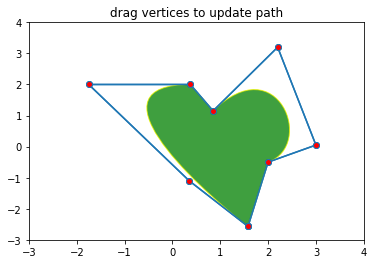

In [10]:
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path

fig, ax = plt.subplots()

pathdata = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]

codes, verts = zip(*pathdata)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)


class PathInteractor(object):
    """
    An path editor.

    Key-bindings

      't' toggle vertex markers on and off.  When vertex markers are on,
          you can move them, delete them


    """

    showverts = True
    epsilon = 5  # max pixel distance to count as a vertex hit

    def __init__(self, pathpatch):

        self.ax = pathpatch.axes
        canvas = self.ax.figure.canvas
        self.pathpatch = pathpatch
        self.pathpatch.set_animated(True)

        x, y = zip(*self.pathpatch.get_path().vertices)

        self.line, = ax.plot(x, y, marker='o', markerfacecolor='r', animated=True)

        self._ind = None  # the active vert

        canvas.mpl_connect('draw_event', self.draw_callback)
        canvas.mpl_connect('button_press_event', self.button_press_callback)
        canvas.mpl_connect('key_press_event', self.key_press_callback)
        canvas.mpl_connect('button_release_event', self.button_release_callback)
        canvas.mpl_connect('motion_notify_event', self.motion_notify_callback)
        self.canvas = canvas

    def draw_callback(self, event):
        self.background = self.canvas.copy_from_bbox(self.ax.bbox)
        self.ax.draw_artist(self.pathpatch)
        self.ax.draw_artist(self.line)
        self.canvas.blit(self.ax.bbox)

    def pathpatch_changed(self, pathpatch):
        'this method is called whenever the pathpatchgon object is called'
        # only copy the artist props to the line (except visibility)
        vis = self.line.get_visible()
        plt.Artist.update_from(self.line, pathpatch)
        self.line.set_visible(vis)  # don't use the pathpatch visibility state

    def get_ind_under_point(self, event):
        'get the index of the vertex under point if within epsilon tolerance'

        # display coords
        xy = np.asarray(self.pathpatch.get_path().vertices)
        xyt = self.pathpatch.get_transform().transform(xy)
        xt, yt = xyt[:, 0], xyt[:, 1]
        d = np.sqrt((xt - event.x)**2 + (yt - event.y)**2)
        ind = d.argmin()

        if d[ind] >= self.epsilon:
            ind = None

        return ind

    def button_press_callback(self, event):
        'whenever a mouse button is pressed'
        if not self.showverts:
            return
        if event.inaxes is None:
            return
        if event.button != 1:
            return
        self._ind = self.get_ind_under_point(event)

    def button_release_callback(self, event):
        'whenever a mouse button is released'
        if not self.showverts:
            return
        if event.button != 1:
            return
        self._ind = None

    def key_press_callback(self, event):
        'whenever a key is pressed'
        if not event.inaxes:
            return
        if event.key == 't':
            self.showverts = not self.showverts
            self.line.set_visible(self.showverts)
            if not self.showverts:
                self._ind = None

        self.canvas.draw()

    def motion_notify_callback(self, event):
        'on mouse movement'
        if not self.showverts:
            return
        if self._ind is None:
            return
        if event.inaxes is None:
            return
        if event.button != 1:
            return
        x, y = event.xdata, event.ydata

        vertices = self.pathpatch.get_path().vertices

        vertices[self._ind] = x, y
        self.line.set_data(zip(*vertices))

        self.canvas.restore_region(self.background)
        self.ax.draw_artist(self.pathpatch)
        self.ax.draw_artist(self.line)
        self.canvas.blit(self.ax.bbox)


interactor = PathInteractor(patch)
ax.set_title('drag vertices to update path')
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 4)

plt.show()

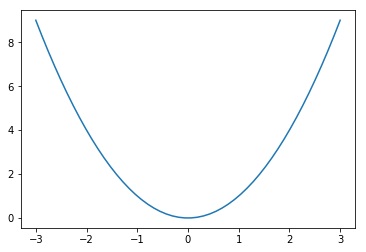

In [11]:
# Simple example of using general timer objects. This is used to update
# the time placed in the title of the figure.
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


def update_title(axes):
    axes.set_title(datetime.now())
    axes.figure.canvas.draw()

fig, ax = plt.subplots()

x = np.linspace(-3, 3)
ax.plot(x, x*x)

# Create a new timer object. Set the interval to 100 milliseconds
# (1000 is default) and tell the timer what function should be called.
timer = fig.canvas.new_timer(interval=100)
timer.add_callback(update_title, ax)
timer.start()

# Or could start the timer on first figure draw
#def start_timer(evt):
#    timer.start()
#    fig.canvas.mpl_disconnect(drawid)
#drawid = fig.canvas.mpl_connect('draw_event', start_timer)

plt.show()

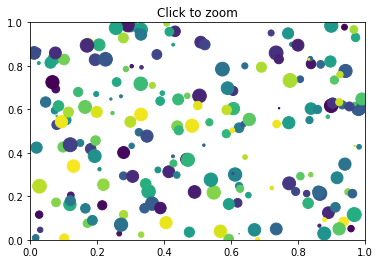

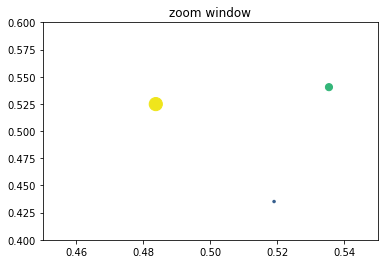

In [12]:
"""
This example shows how to connect events in one window, for example, a mouse
press, to another figure window.

If you click on a point in the first window, the z and y limits of the
second will be adjusted so that the center of the zoom in the second
window will be the x,y coordinates of the clicked point.

Note the diameter of the circles in the scatter are defined in
points**2, so their size is independent of the zoom
"""
from matplotlib.pyplot import figure, show
import numpy
figsrc = figure()
figzoom = figure()

axsrc = figsrc.add_subplot(111, xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
axzoom = figzoom.add_subplot(111, xlim=(0.45, 0.55), ylim=(0.4, .6),
                             autoscale_on=False)
axsrc.set_title('Click to zoom')
axzoom.set_title('zoom window')
x, y, s, c = numpy.random.rand(4, 200)
s *= 200


axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def onpress(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', onpress)
show()

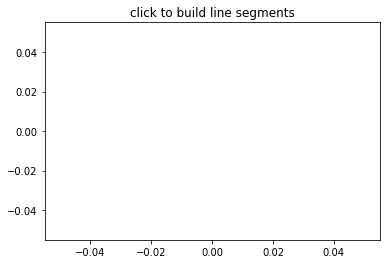

In [13]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()